In [4]:
from __future__ import division, print_function

from collections import defaultdict
import os

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Approximation

In [5]:
approx = defaultdict(int)
mafs = []
for fname in os.listdir('.'):
    if not fname.startswith('tsi-') or not fname.endswith('.frq'):
        continue
    f = open(fname)
    f.readline()
    for cnt, l in enumerate(f):
        toks = [tok for tok in l.rstrip().split(' ') if tok != '']
        maf = float(toks[-2])
        mafs.append(maf)
        approx[maf] += 1
    f.close()

In [6]:
print(len(mafs), type(mafs))
print(len(approx))

1222126 <type 'list'>
417


In [7]:
%time print(np.median(mafs))

0.2216
CPU times: user 95.3 ms, sys: 11.9 ms, total: 107 ms
Wall time: 137 ms


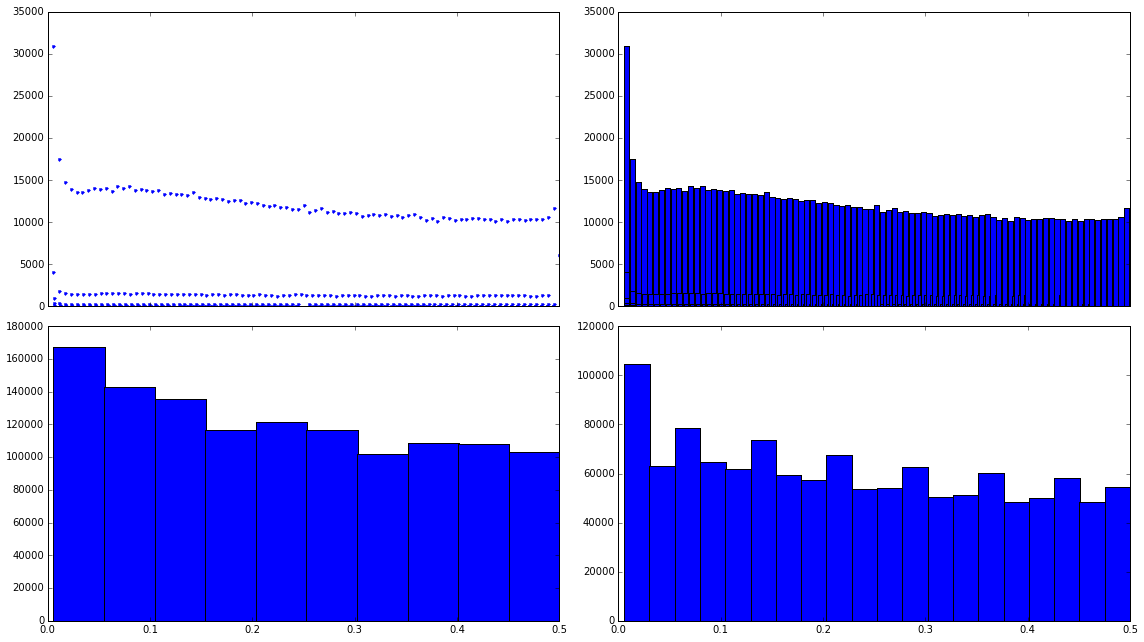

In [8]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))

xs, ys = zip(*approx.items())
axs[0, 0].plot(xs, ys, '.')

xs = list(approx.keys())
xs.sort()
ys = [approx[x] for x in xs]
axs[0, 1].bar(xs, ys, 0.005)

def get_bins(my_dict, nbins):
    acumulator = [0] * nbins
    xmin, xmax = xs[0], xs[-1]
    interval = (xmax - xmin) / nbins
    bin_xs = [xmin + i * interval + interval / 2 for i in range(nbins)]
    #the starting point, midpoint woudl take more interval / 2
    curr_bin = 0
    for x in xs:
        y_cnt = approx[x]
        while curr_bin + 1 != nbins and abs(x - bin_xs[curr_bin]) > abs(x - bin_xs[curr_bin + 1]):
            curr_bin += 1
        acumulator[curr_bin] += y_cnt
    return bin_xs, acumulator, interval

bin_xs, acumulator, interval = get_bins(approx, 10)
axs[1, 0].bar(np.array(bin_xs) - interval / 2, acumulator, 0.5 / 10)

bin_xs, acumulator, interval = get_bins(approx, 20)
axs[1, 1].bar(np.array(bin_xs) - interval / 2, acumulator, 0.5 / 20)
axs[1, 1].set_xlim(0, 0.5)

fig.tight_layout()

In [9]:
def compute_median_from_dictionary(my_dict):
    xs = list(my_dict.keys())
    xs.sort()
    x_cnt = [my_dict[x] for x in xs]
    start = 0
    end = len(xs) - 1
    while start != end:
        if start == end - 1 and x_cnt[start] == x_cnt[end]:
            return (xs[start] + xs[end]) / 2
        if x_cnt[start] > x_cnt[end]:
            x_cnt[start] -= x_cnt[end]
            end -= 1
        elif x_cnt[start] < x_cnt[end]:
            x_cnt[end] -= x_cnt[start]
            start += 1
        else:
            start += 1
            end -= 1
    return xs[start]

In [10]:
print(compute_median_from_dictionary(approx))

0.2216


In [11]:
#do not put this, but discuss
for my_round in [1, 2, 3]:
    my_approx = defaultdict(int)
    for val, cnt in approx.items():
        my_approx[round(val, my_round)] += cnt
    print(len(my_approx), compute_median_from_dictionary(my_approx))

6 0.2
50 0.22
326 0.222


## Subsampling

In [16]:
import random
import pandas as pd
arr = np.ndarray(shape=(5, 6), dtype=float)
samp_sizes = [1, 10, 100, 1000, 10000]
for rep in range(3):
    for si, samp_size in enumerate([1, 10, 100, 1000, 10000]):
        my_vals = random.sample(mafs, samp_size)
        arr[si, rep] = np.median(my_vals)
        arr[si, rep + 3] = max(my_vals)
df = pd.DataFrame(arr, index=samp_sizes,
                  columns=['Mean #1', 'Mean #2', 'Mean #3', 'Max #1', 'Max #2', 'Max #3'])
df

,Mean #1,Mean #2,Mean #3,Max #1,Max #2,Max #3
1,0.06818,0.181800,0.07386,0.06818,0.1818,0.07386
10,0.19315,0.170465,0.26135,0.50000,0.4602,0.47160
100,0.23300,0.221600,0.21260,0.49430,0.5000,0.50000
1000,0.22730,0.200000,0.22990,0.50000,0.5000,0.50000
10000,0.22410,0.222550,0.22160,0.50000,0.5000,0.50000


In [13]:
#bill gates effect